In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy import signal, ndimage
from skimage import measure
import time
import pandas as pd

%matplotlib inline

In [3]:
image1 = cv2.imread('../../EUV_images/code_test/Manual-Window1-Top-CMix0-0516085648.Jpeg',0) #0 for grayscale
print(image1.shape)

(480, 480)


In [4]:
raw_image = cv2.resize(image1, (480,480))
width, height = raw_image.shape

"""
for i in range(380,420):
    for j in range(100, 380):
        raw_image[i][j] = raw_image[i][0]
        
"""

'\nfor i in range(380,420):\n    for j in range(100, 380):\n        raw_image[i][j] = raw_image[i][0]\n        \n'

In [5]:
ret,thresh1 = cv2.threshold(raw_image,100,1,cv2.THRESH_BINARY) #binary threshold
blur = cv2.GaussianBlur(raw_image,(3,3),0)
ret3,thresh3 = cv2.threshold(blur,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)  #Otsu's thresholding

In [6]:
th = cv2.adaptiveThreshold(raw_image,1,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

(<matplotlib.axes._subplots.AxesSubplot at 0xf83f2e8>,
 <matplotlib.image.AxesImage at 0xf246940>)

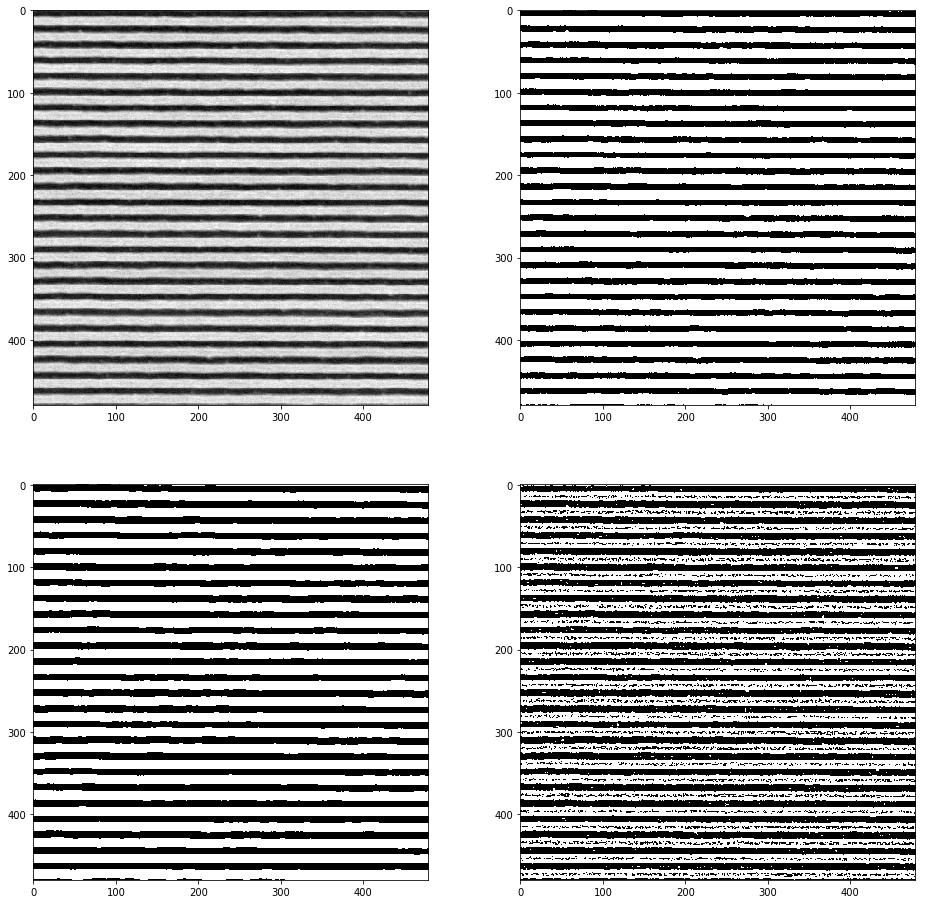

In [7]:
plt.subplots(2,2,figsize=(16,16))
plt.subplot(221), plt.imshow(raw_image, cmap='gray')
plt.subplot(222), plt.imshow(thresh1, cmap='gray')
plt.subplot(223), plt.imshow(thresh3, cmap='gray')
plt.subplot(224), plt.imshow(th, cmap='gray')

In [16]:
print(thresh3[:,250])

[1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0]


In [17]:
#label every stripe
#start_time = time.time()
#thresh_label = measure.label(thresh3, background=0)
thresh_img, thresh_label = ndimage.label(thresh3)
#print(time.time() - start_time)
#print("second line")
#measure line width in pixels
vertical_line = thresh_img[:,100]
p_num = 0 #count total pixels for white line
for i in range(0, 480):
    if vertical_line[i] != 0:
        p_num += 1
tot_line = np.max(vertical_line) #largest value in the line is the total number of lines

line_width = (p_num/tot_line) #average line width in pixels
line_dist = ((480-p_num)/tot_line)

if line_width - int(line_width) > 0.5:
    line_width = int(line_width) + 1
else:
    line_width = int(line_width)
if line_dist - int(line_dist) > 0.5:
    line_dist = int(line_dist) + 1
else:
    line_dist = int(line_dist)

In [18]:
print(thresh_img[:, 250])

[ 6  6  0  0  0  0  0  0  0  0  7  7  7  7  7  7  7  7  7  7  7  0  0  0  0
  0  0  0  0  8  8  8  8  8  8  8  8  8  8  8  0  0  0  0  0  0  0  0  9  9
  9  9  9  9  9  9  9  9  9  0  0  0  0  0  0  0  0 10 10 10 10 10 10 10 10
 10 10 10  0  0  0  0  0  0  0  0 11 11 11 11 11 11 11 11 11 11 11  0  0  0
  0  0  0  0  0 12 12 12 12 12 12 12 12 12 12 12  0  0  0  0  0  0  0  0 13
 13 13 13 13 13 13 13 13 13 13  0  0  0  0  0  0  0  0  0 14 14 14 14 14 14
 14 14 14 14 14  0  0  0  0  0  0  0 15 15 15 15 15 15 15 15 15 15 15  0  0
  0  0  0  0  0  0  0 16 16 16 16 16 16 16 16 16 16 16  0  0  0  0  0  0  0
  0 17 17 17 17 17 17 17 17 17 17 17  0  0  0  0  0  0  0  0 18 18 18 18 18
 18 18 18 18 18 18  0  0  0  0  0  0  0  0 19 19 19 19 19 19 19 19 19 19  0
  0  0  0  0  0  0  0  0 20 20 20 20 20 20 20 20 20 20 20  0  0  0  0  0  0
  0  0 21 21 21 21 21 21 21 21 21 21 21  0  0  0  0  0  0  0  0 22 22 22 22
 22 22 22 22 22 22 22  0  0  0  0  0  0  0  0 23 23 23 23 23 23 23 23 23 23
 23  0  0  0

In [20]:
#print(line_width, line_dist)
line_width, line_dist = 11,8

In [21]:
line2 = np.ones(shape=(2*line_dist+line_width,1))

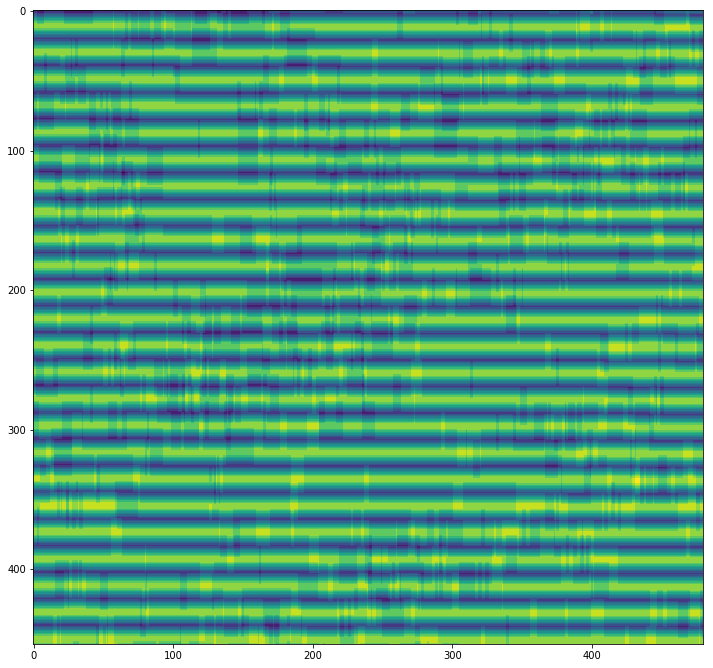

In [24]:
f = signal.convolve2d(thresh3, line2, 'valid')

plt.figure(figsize=(12,12))
plt.imshow(f)

In [25]:
#print(f[:,230])
print(int(np.min(f)), int(np.max(f)))

9 21


In [107]:
#print(f[:,228])
from numpy import argmax, argmin, unravel_index

unravel_index(f.argmin(), f.shape)

(299, 250)

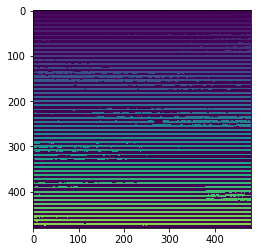

In [21]:
labels = measure.label(thresh3, background=0)
plt.imshow(labels)

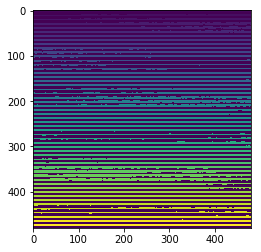

In [253]:
plt.imshow(thresh_img)

(<matplotlib.axes._subplots.AxesSubplot at 0x1b87ebe0>,
 <matplotlib.contour.QuadContourSet at 0x1d14b898>)

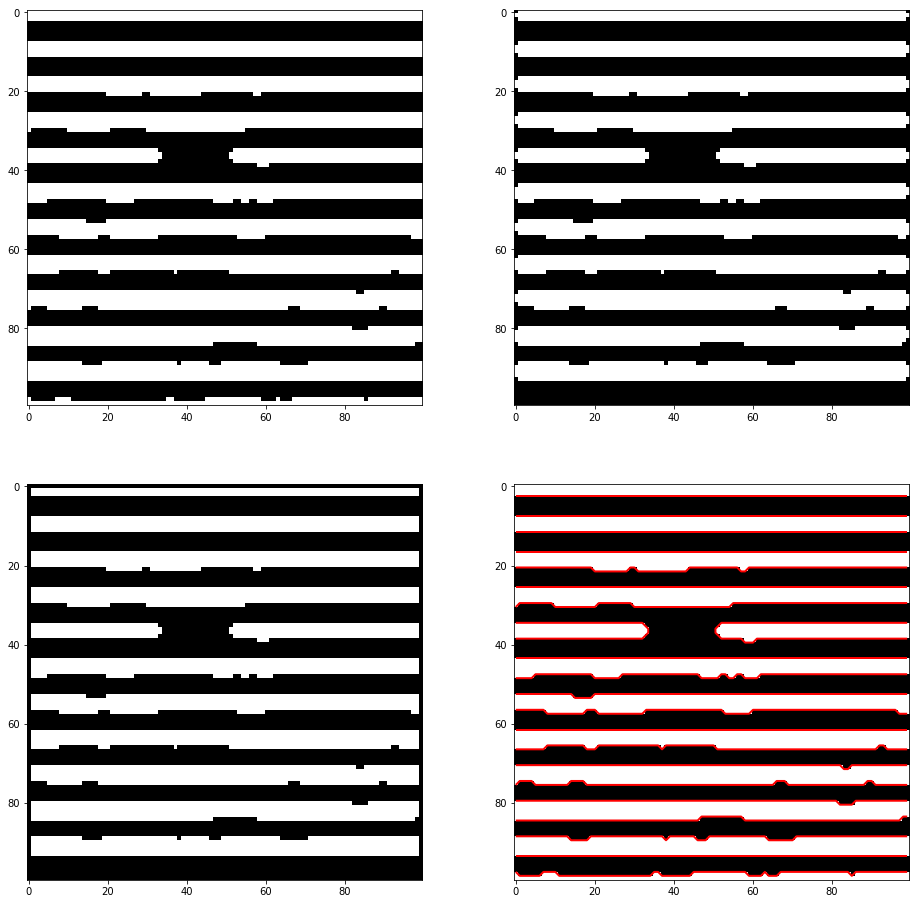

In [279]:
mask = thresh3[250:350, 150:250]

# Remove small white regions
open_img = ndimage.binary_opening(mask)
# Remove small black hole
close_img = ndimage.binary_closing(open_img)

plt.subplots(2,2, figsize=(16,16))
plt.subplot(221), plt.imshow(mask, cmap='gray')
plt.subplot(222), plt.imshow(open_img, cmap='gray')
plt.subplot(223), plt.imshow(close_img, cmap='gray')
plt.subplot(224), plt.imshow(mask, cmap='gray'), plt.contour(mask, [0.5], linewidths=2, colors='r')